In [1]:
%pylab inline
from sklearn.cross_decomposition import CCA

Populating the interactive namespace from numpy and matplotlib


# Cannonical Correlation analysis

### Setup test data

In [2]:
X = np.array(
[[0.5,0.1],
[0.1,0.2],
[0.6,0.1],
[0.7,0.2],
[0.9,0.3]])
X = X-X.mean(axis=0) # normalize things, so this doesn't hurt

Y = np.array(
[[0.6,0.2],
[0.2,0.3],
[0.4,0.3],
[0.3,0.4],
[0.1,0.9]])
Y = Y-Y.mean(axis=0) # normalize things, so this goes on better

### Create CCA from sklearn

In [3]:
cca = CCA()
cca.fit(X,Y)
cca.x_weights_

array([[ 0.37248008,  0.92804019],
       [ 0.92804019, -0.37248008]])

### Writeout coefs

In [4]:
cca = CCA(n_components=1)
cca.fit(X,Y)
X_scores,Y_scores = cca.transform(X,Y)
cca.x_weights_

array([[ 0.37248008],
       [ 0.92804019]])

## My own CCA

In [5]:
from cca import calc_cca

In [6]:
%%time
# Test CCA from sklearn
cca = CCA(n_components=1)
cca.fit(X,Y)
X1,Y1 = cca.transform(X,Y)
print( 'Correlation coef: {: >5.2f}'.format( np.corrcoef( np.ravel(X1), np.ravel(Y1) )[0,1] )) # calculate correlation coefficient
# print( '{: >5.2f}|'.format( np.corrcoef( X1[:,0], Y1[:,0] )[0,1] ), end=' ')
# print( '{: >5.2f}'.format( np.corrcoef( X1[:,1], Y1[:,1] )[0,1] ) )


Correlation coef:  0.97
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.02 ms


In [7]:
%%time
# Test my own CCA
X1,Y1=calc_cca(X,Y)
print( 'Correlation coef: {: >5.2f}'.format( np.corrcoef( X1, Y1 )[0,1] )) # calculate correlation coefficient

Correlation coef:  0.96
CPU times: user 932 ms, sys: 672 ms, total: 1.6 s
Wall time: 813 ms


# Playing with TensorFlow

Test created default setup

Tensorflow models are usually splitted into data\model\session

- data.py module contains code to feed data into session
- model.py module contains code, defining tensorflow calculation graph
- session.py contains conde to optimize model from mode.py on data from data.py

In [8]:
import tensorflow as tf
import importlib # for module reloads

import data
import model
import session
importlib.reload(data) # Reload for module, so it updates on each cell run
importlib.reload(model)
importlib.reload(session);

dat = data.SampleFeed(batch_size=5)
mdl = model.LinearRegression()
sess = session.AdamOptimizer(mdl,dat,learning_rate=0.001,display_step=50)

In [9]:
sess.optimize() # Run optimization session

Initialization weights:
W: -1.09508
b: -0.964927

############# Epoch:   50 #############
W: -0.946064
b: -0.814963
Loss:  9.50574
############# Epoch:  100 #############
W: -0.797297
b: -0.664982
Loss:  8.37535
############# Epoch:  150 #############
W: -0.6486
b: -0.51499
Loss:  7.24579
############# Epoch:  200 #############
W: -0.499976
b: -0.364993
Loss:  6.1173
############# Epoch:  250 #############
W: -0.351462
b: -0.215007
Loss:  4.99053
############# Epoch:  300 #############
W: -0.203148
b: -0.0650723
Loss:  3.86696
############# Epoch:  350 #############
W: -0.0552657
b: 0.0846749
Loss:  2.75046
############# Epoch:  400 #############
W: 0.0914012
b: 0.23367
Loss:  1.65478
############# Epoch:  450 #############
W: 0.232272
b: 0.378012
Loss:  0.670097
############# Epoch:  500 #############
W: 0.300447
b: 0.457349
Loss:  0.410265
############# Epoch:  550 #############
W: 0.298555
b: 0.47284
Loss:  0.408731
############# Epoch:  600 #############
W: 0.296379
b: 0.488388
Los

### Plot fitted line

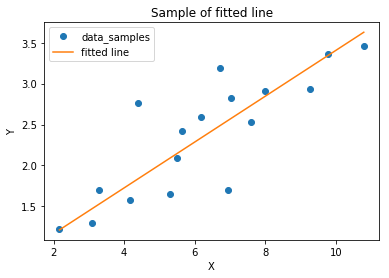

In [10]:
X = dat.get_test_data()['X'] 
y = dat.get_test_data()['Y'] 
y_pred = sess.predict( dat.get_test_data()['X'] )

x_line = np.linspace(np.min(X),np.max(X),3,endpoint=True)
y_line = sess.predict( x_line )

plot(X,y,'o',label='data_samples')
plot(x_line,y_line,label='fitted line')
np.linspace(np.min(X),np.max(X),3,endpoint=True)
title('Sample of fitted line')
xlabel('X')
ylabel('Y')
legend();

## Now everything is ready to put more complex CCA formula into tensorflow and see what it does